# What are Hashtables ?


<font size="4">1) Hashtables are an array that links a key to a specific data value(s), where each key is unique.
    
<font size="4">2) They are data structure that efficiently implements search/lookup operations.
    
<font size="4">3) It aims to divide the whole search space into well-defined regions, so we don’t have to search linearly through the entire collection to find an element. 

# How do they work ?

  <font size="4">1) Entire search space is divided into sections called Buckets. Each bucket has a corresponding Index.
  
  <font size="4">2) Keys are converted to Indexes using a Hash-Function.

  <font size="4">3) The (Key, Value) pairs are then stored in the appropriate bucket.

<div>
<img src="hfunction.png" width="600"/>
</div>

# Why do we need them?

![image.png](post_mib.gif)


<font size="4">1) Drastically speed up insert, delete and search operations.
    
<font size="4">2) Normal linear search takes O(N) time. Not good for large datasets.
    
<font size="4">3) Since search space is divided into buckets, Hashtables take approximately O(1) time to search. </font>

# Why is it interesting ? 🤔

<font size="4">1) Used in search engines like Google.
    
<font size="4">2) Several dynamic programming languages like Python, Java, and Ruby use hash tables to implement objects.

In [2]:
import ipywidgets as widgets
import random

def create_empty_hash_table(n):
    """Creates hashtable with n empty buckets"""
    return [[] for x in range(n)]

def good_func(key, n):
    h = 0
    for c in key:
        h = h*31 + ord(c)
    return h%n
    
def htable_put_2(table, key, value):
    """Inserts (username, pwd) tuple in appropriate buckets"""
    bucket = table[good_func(key, s.value)]
    bucket.append((key, value))

def populate_hashtable_2(table, users):
    """Iterates through a list of (username, pwd) tuples and places them in appropriate buckets"""
    for username, pwd in users:
        htable_put_2(table, username, pwd)
    return table

def htable_search_2(table, key):
    """Searches a specific bucket in the hashtable and returns (username, pwd) tuple"""
    bucket = table[good_func(key, s.value)]
    return linear_search(bucket, key)

def linear_search(users, key):
    """Basic linear search which searches a list of names and returns (username, pwd) tuple"""
    for username, pwd in users:
        if username == key:
            return (username, pwd)

def read_users():
    users = list()
    with open('data_users.csv') as f:
        f.readline()
        data = f.read().split('\n')
        for user in data:
            username, password = user.split(',')
            users.append((username, password))
        return users
users = read_users()

## Selecting a random username to search.

In [92]:
user_to_search = users[-random.randint(0,1000)][0]
user_to_search

'mostnicahol4l9vtwjb3b'

## Basic Linear search. Takes a lot of time 😔

In [98]:
%%time 
t = [linear_search(users, user_to_search) for i in range(10000)]

CPU times: user 2.92 s, sys: 11.3 ms, total: 2.94 s
Wall time: 2.95 s


## Lets try searching using Hashtables with custom bucket size.

In [3]:
s = widgets.IntSlider(
    value=26,
    min=1,
    max=1000,
    step=1,
    description='Buckets: ',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=widgets.Layout(width='800px')
)
s

IntSlider(value=26, description='Buckets: ', layout=Layout(width='800px'), max=1000, min=1)

In [104]:
table = create_empty_hash_table(s.value)
table = populate_hashtable_2(table, users)

In [105]:
%%time 
tym = [htable_search_2(table, user_to_search) for i in range(10000)]

CPU times: user 64.3 ms, sys: 2.36 ms, total: 66.6 ms
Wall time: 65.6 ms


In [74]:
x1 = [145, 691, 1390, 2050, 2760]
x2 = [28.3, 110, 213, 312, 408]
x3 = [3140 , 15600 , 30900 , 46600 , 62000]

y = [10000, 50000, 100000, 150000, 200000]

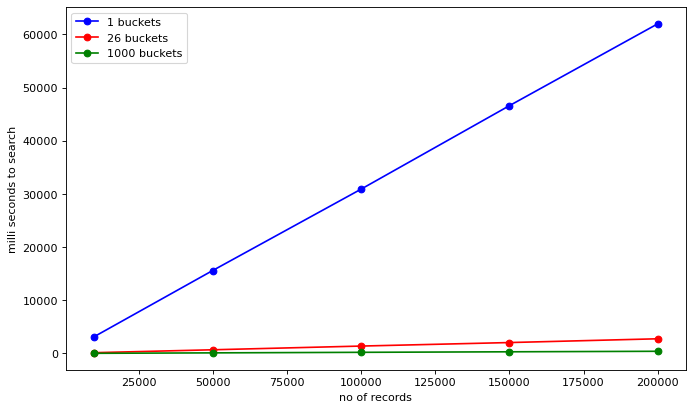

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(y, x3, label='1 buckets', marker='o', color='blue')
plt.plot(y, x1, label='26 buckets', marker='o', color='red')
plt.plot(y, x2, label='1000 buckets', marker='o', color='green')
plt.ylabel('milli seconds to search')
plt.xlabel('no of records')
plt.legend()
plt.show()

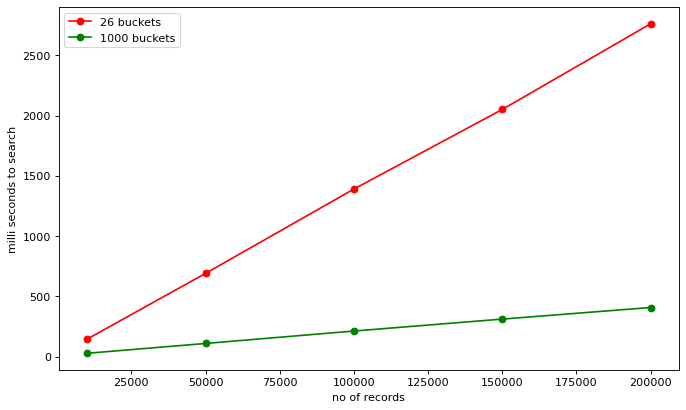

In [31]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(y, x1, label='26 buckets', marker='o', color='red')
plt.plot(y, x2, label='1000 buckets', marker='o', color='green')
plt.ylabel('milli seconds to search')
plt.xlabel('no of records')
plt.legend()
plt.show()